# Goal:

Can we guess how the noise is generated?

1. See how many points are exactly on the y=0.1 * meanX line
2. Try to model dist. of difference from the line

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [2]:
DIRECTORY = './data/'
train = pd.read_csv(DIRECTORY + 'train.csv').drop(columns='id')
train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


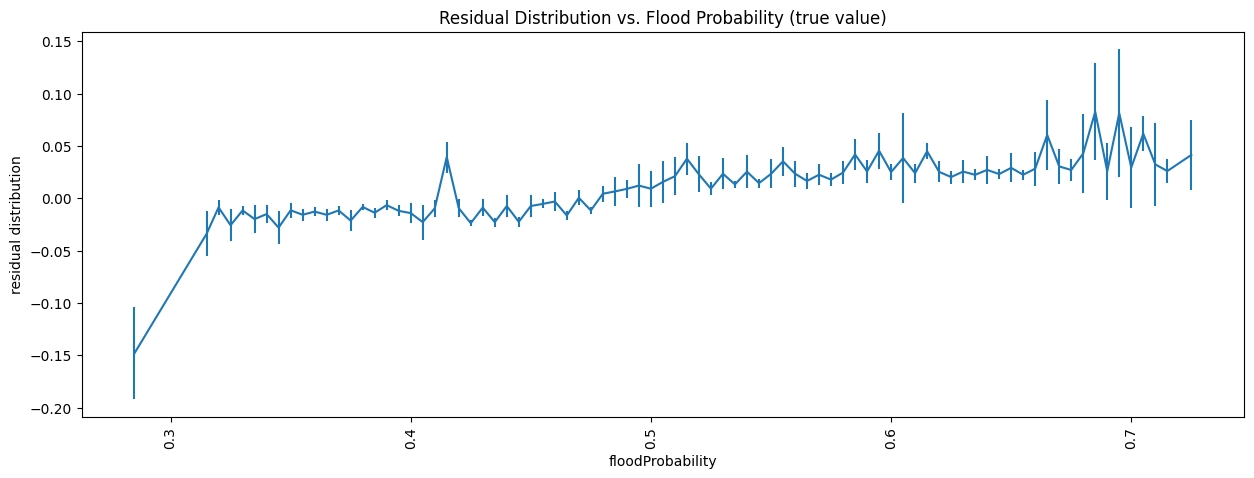

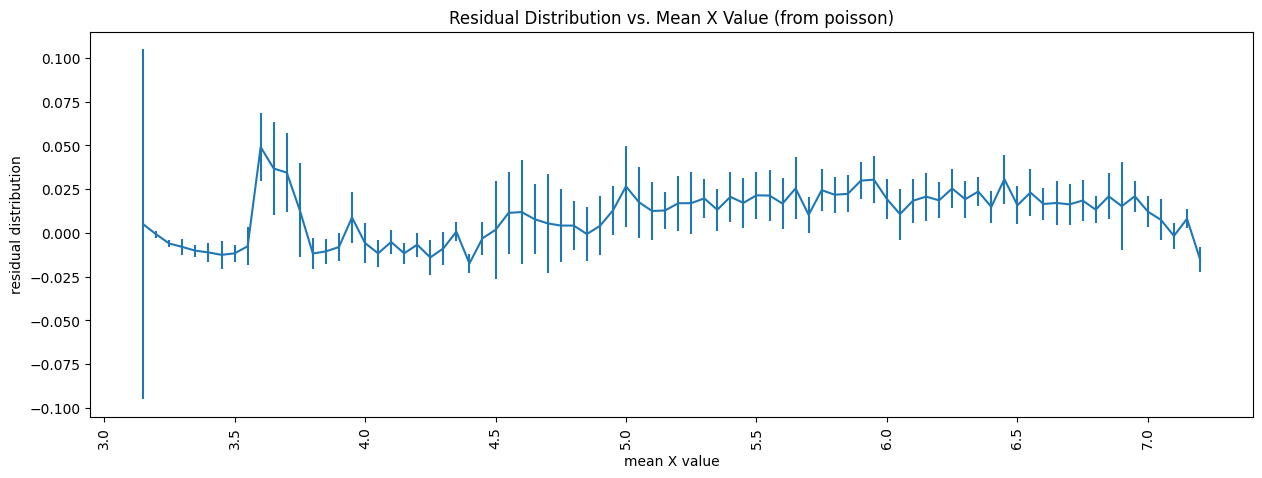

In [18]:
means = train.drop(columns='FloodProbability').mean(axis=1)
prediction_df = pd.DataFrame({
    'mean': means,
    'floodProbability': train['FloodProbability']
})

prediction_df['residuals'] = prediction_df['floodProbability'] - 0.1 * prediction_df['mean']


grouping = prediction_df.groupby('floodProbability')['residuals'].agg(['mean', 'std', 'count']).fillna(0.10)
plt.figure(figsize=(15,5))
plt.errorbar(x=grouping.index, y=grouping['mean'], yerr=grouping['std'])
plt.xlabel('floodProbability')
plt.ylabel('residual distribution')
plt.title('Residual Distribution vs. Flood Probability (true value)')
plt.xticks(rotation=90);
plt.show()

grouping2 = prediction_df.groupby('mean')['residuals'].agg(['mean', 'std', 'count']).fillna(0.10)
plt.figure(figsize=(15,5))
plt.errorbar(x=grouping2.index, y=grouping2['mean'], yerr=grouping2['std'])
plt.xlabel('mean X value')
plt.ylabel('residual distribution')
plt.title('Residual Distribution vs. Mean X Value (from poisson)')
plt.xticks(rotation=90);
plt.show()